In [30]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [31]:
df_merged = pd.read_csv("data\_2022\_merged\merged_data.csv")
df_merged 

,valid_time,latitude,longitude,max_temperature,mean_temperature,max_precipitation,mean_precipitation,mslp
0,01-01-22,18.80,72.8,300.71133,298.56198,0.000000e+00,0.000000e+00,101597.260
1,01-01-22,19.05,72.8,301.39688,298.33347,0.000000e+00,0.000000e+00,101607.690
2,02-01-22,18.80,72.8,300.84480,298.62933,1.910000e-07,1.590000e-08,101467.840
3,02-01-22,19.05,72.8,301.44702,298.47852,0.000000e+00,0.000000e+00,101474.820
4,03-01-22,18.80,72.8,300.86963,298.79434,0.000000e+00,0.000000e+00,101401.260
...,...,...,...,...,...,...,...,...
725,29-12-22,19.05,72.8,300.55960,297.87854,0.000000e+00,0.000000e+00,101602.900
726,30-12-22,18.80,72.8,300.11480,298.08383,0.000000e+00,0.000000e+00,101704.600
727,30-12-22,19.05,72.8,300.63086,297.82187,0.000000e+00,0.000000e+00,101708.836
728,31-12-22,18.80,72.8,299.76215,297.80264,0.000000e+00,0.000000e+00,101665.710


In [32]:
df_merged["valid_time"] = pd.to_datetime(df_merged["valid_time"], format="%d-%m-%y")
df_merged["month"] = df_merged["valid_time"].dt.month

# Group by month and calculate mean values for visualization
monthly_data = df_merged.groupby("month").mean()

# Set figure size
plt.figure(figsize=(2, 2))

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

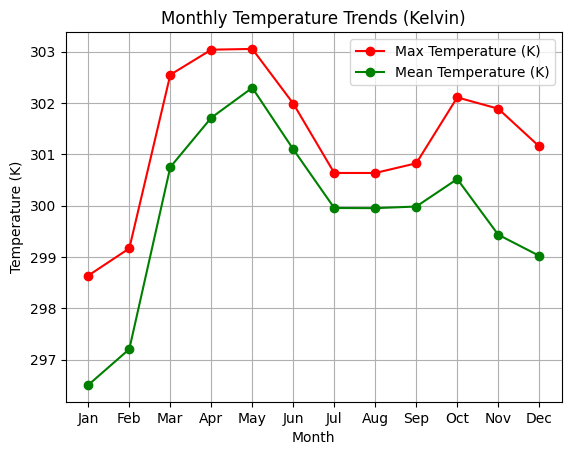

In [33]:
# Plot 1: Temperature Trends
plt.subplot(1, 1, 1)
plt.plot(monthly_data.index, monthly_data["max_temperature"], label="Max Temperature (K)", color="red", marker="o")
plt.plot(monthly_data.index, monthly_data["mean_temperature"], label="Mean Temperature (K)", color="green", marker="o")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.title("Monthly Temperature Trends (Kelvin)")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.legend()
plt.show()


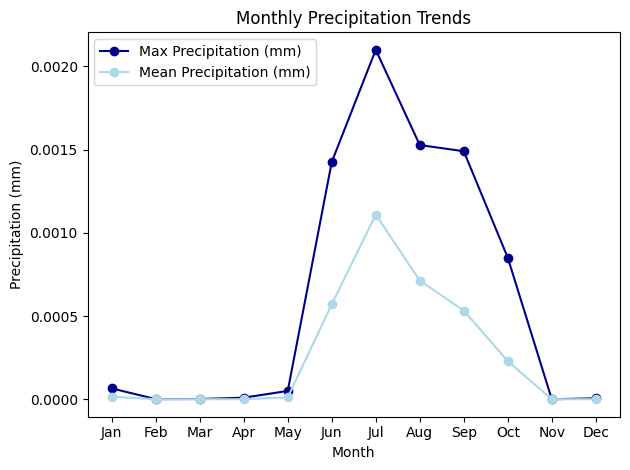

In [34]:
plt.subplot(1, 1, 1)
plt.plot(monthly_data.index, monthly_data["max_precipitation"], label="Max Precipitation (mm)", color="darkblue", marker="o")
plt.plot(monthly_data.index, monthly_data["mean_precipitation"], label="Mean Precipitation (mm)", color="lightblue", marker="o")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.title("Monthly Precipitation Trends")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.tight_layout()
plt.show()

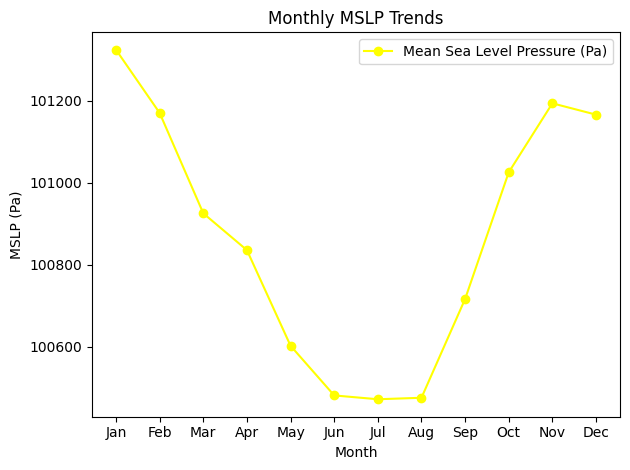

In [35]:
plt.subplot(1, 1, 1)
plt.plot(monthly_data.index, monthly_data["mslp"], label="Mean Sea Level Pressure (Pa)", color="yellow", marker="o")
plt.xlabel("Month")
plt.ylabel("MSLP (Pa)")
plt.title("Monthly MSLP Trends")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Ensure valid_time is in datetime format
df_merged["valid_time"] = pd.to_datetime(df_merged["valid_time"], format="%d-%m-%y", errors="coerce")

# Extract numeric features from date
df_merged["month"] = df_merged["valid_time"].dt.month  # Extract month (1-12)
df_merged["day_of_year"] = df_merged["valid_time"].dt.dayofyear 
df_merged["year"] = df_merged["valid_time"].dt.year         # Extract Year
 # Extract day of year (1-365)

# Drop the original datetime column
df_merged.drop(columns=["valid_time"], inplace=True)
df_merged

,latitude,longitude,max_temperature,mean_temperature,max_precipitation,mean_precipitation,mslp,month,day_of_year,year
0,18.80,72.8,300.71133,298.56198,0.000000e+00,0.000000e+00,101597.260,1,1,2022
1,19.05,72.8,301.39688,298.33347,0.000000e+00,0.000000e+00,101607.690,1,1,2022
2,18.80,72.8,300.84480,298.62933,1.910000e-07,1.590000e-08,101467.840,1,2,2022
3,19.05,72.8,301.44702,298.47852,0.000000e+00,0.000000e+00,101474.820,1,2,2022
4,18.80,72.8,300.86963,298.79434,0.000000e+00,0.000000e+00,101401.260,1,3,2022
...,...,...,...,...,...,...,...,...,...,...
725,19.05,72.8,300.55960,297.87854,0.000000e+00,0.000000e+00,101602.900,12,363,2022
726,18.80,72.8,300.11480,298.08383,0.000000e+00,0.000000e+00,101704.600,12,364,2022
727,19.05,72.8,300.63086,297.82187,0.000000e+00,0.000000e+00,101708.836,12,364,2022
728,18.80,72.8,299.76215,297.80264,0.000000e+00,0.000000e+00,101665.710,12,365,2022


In [37]:

heatwave_threshold = df_merged["max_temperature"].quantile(0.90)
# Create binary class label: 1 if max_temperature exceeds threshold, else 0
df_merged["heatwave_label"] = (df_merged["max_temperature"] > heatwave_threshold).astype(int)


In [38]:
df_merged

,latitude,longitude,max_temperature,mean_temperature,max_precipitation,mean_precipitation,mslp,month,day_of_year,year,heatwave_label
0,18.80,72.8,300.71133,298.56198,0.000000e+00,0.000000e+00,101597.260,1,1,2022,0
1,19.05,72.8,301.39688,298.33347,0.000000e+00,0.000000e+00,101607.690,1,1,2022,0
2,18.80,72.8,300.84480,298.62933,1.910000e-07,1.590000e-08,101467.840,1,2,2022,0
3,19.05,72.8,301.44702,298.47852,0.000000e+00,0.000000e+00,101474.820,1,2,2022,0
4,18.80,72.8,300.86963,298.79434,0.000000e+00,0.000000e+00,101401.260,1,3,2022,0
...,...,...,...,...,...,...,...,...,...,...,...
725,19.05,72.8,300.55960,297.87854,0.000000e+00,0.000000e+00,101602.900,12,363,2022,0
726,18.80,72.8,300.11480,298.08383,0.000000e+00,0.000000e+00,101704.600,12,364,2022,0
727,19.05,72.8,300.63086,297.82187,0.000000e+00,0.000000e+00,101708.836,12,364,2022,0
728,18.80,72.8,299.76215,297.80264,0.000000e+00,0.000000e+00,101665.710,12,365,2022,0


In [39]:
if os.path.exists("data/_2022/_labelled/heat_labelled.csv"):
    print("Files already exist")
else:
    df_merged.to_csv("data/_2022/_labelled/heat_labelled.csv")
    print("File created") 

Files already exist
